In [31]:
import numpy as np, re, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from io import StringIO

In [32]:
# Abre o arquivo do relatório
sis2 = open('random-data/rep2.txt').readlines()

In [33]:
# Função responsável por extrair as tabelas do relatório
def get_lines(file, lines_range):
    lines = ''
    for line, block in enumerate(file):
        if line in lines_range and line != 2:
            lines += block
    return lines

In [38]:
def blocks(i):
    return [
        [14+60*i, 20+60*i],
        [24+60*i, 41+60*i,],
        [45+60*i, 57+60*i]
    ]

In [39]:
dataframes = []
for i in range(15):
    for block in blocks(i):
        table = get_lines(sis2, [i for i in range(block[0], block[1])])
        table = re.sub(r'^(.\s_{99}\s\n\n(((\w|.|(|))\s))\n\s{11,}(\w))', '', table)
        table = re.sub(r'\s*\n', '\n', table)
        table = re.sub(r'\n_+', '', table)
        table = re.sub(r'(\s{2,})', ',', table)

        dataframes.append(pd.read_csv(StringIO(table), sep=',', encoding='utf8'))

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


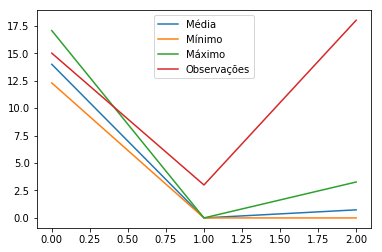

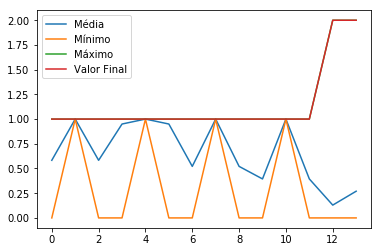

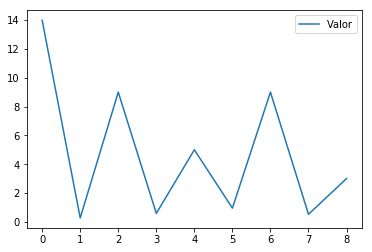

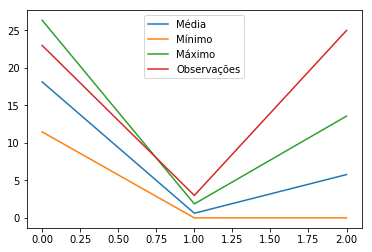

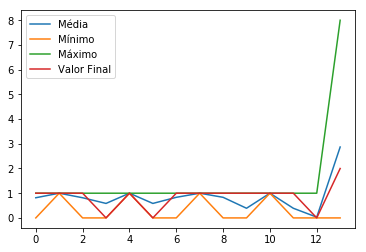

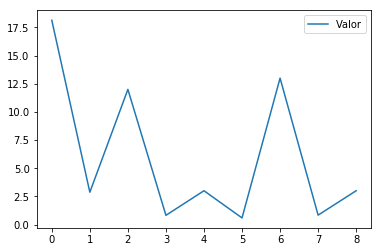

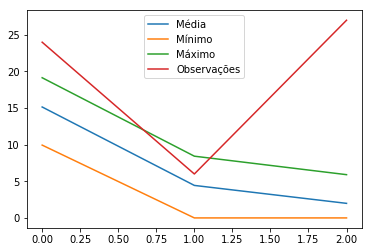

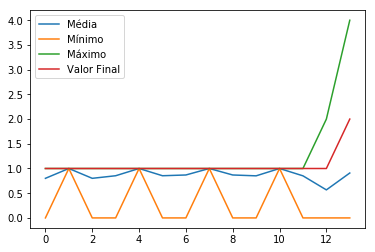

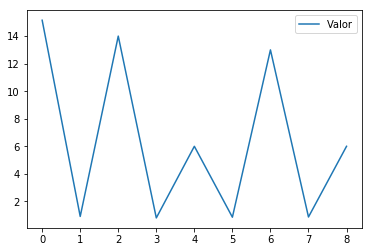

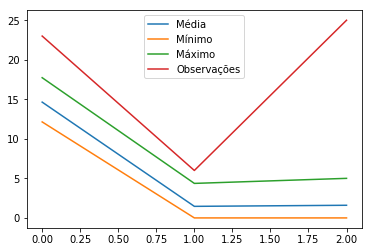

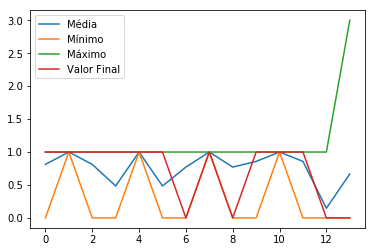

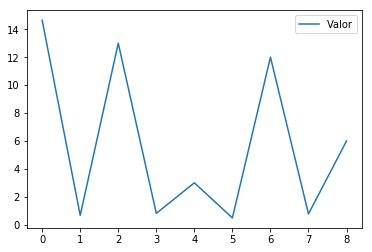

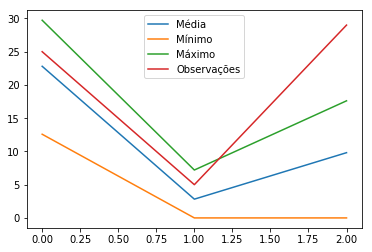

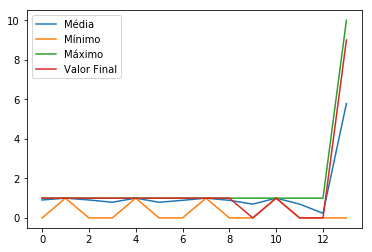

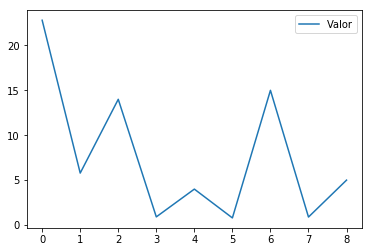

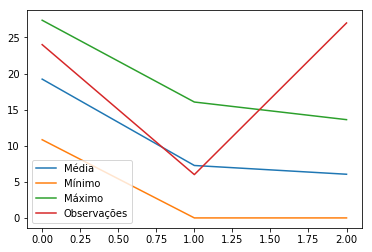

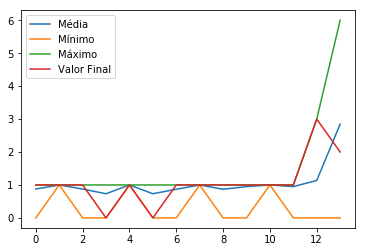

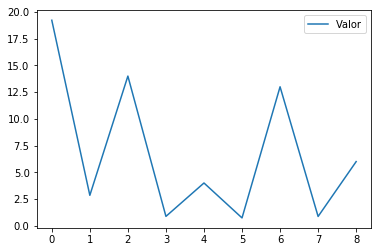

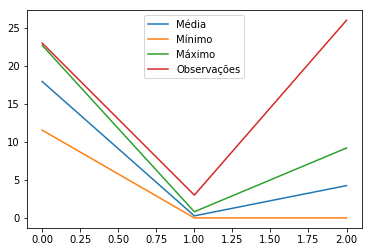

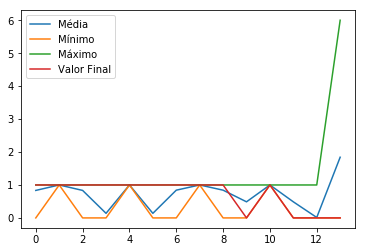

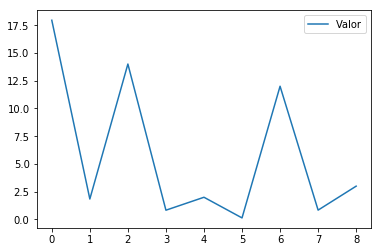

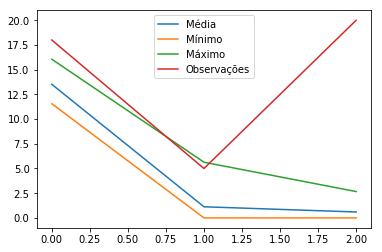

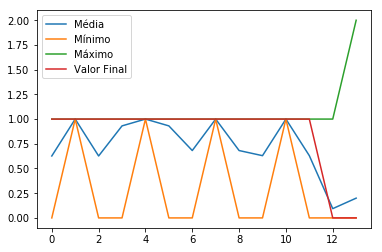

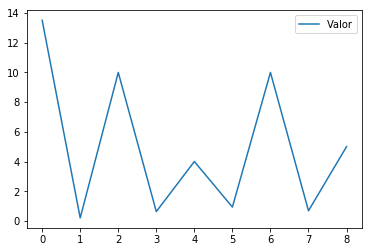

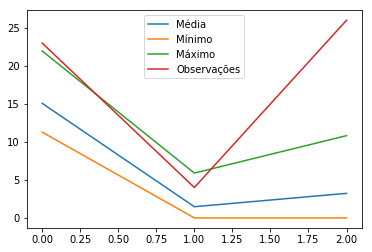

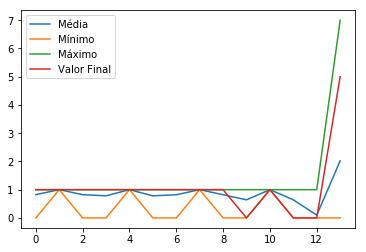

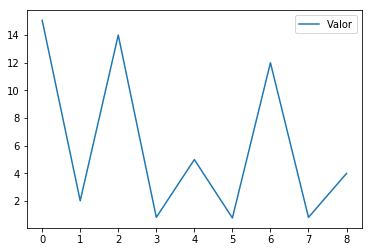

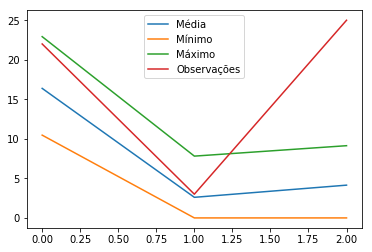

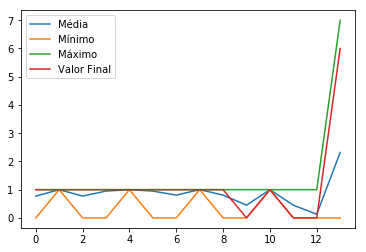

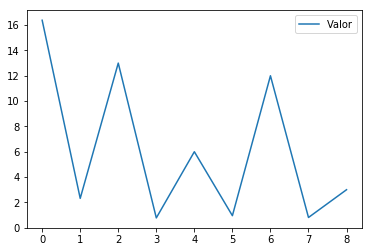

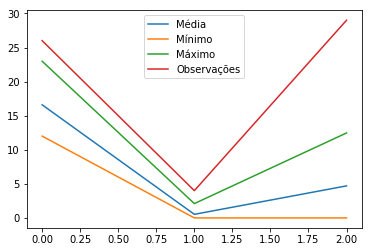

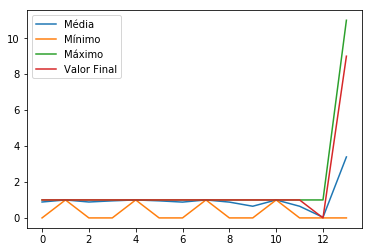

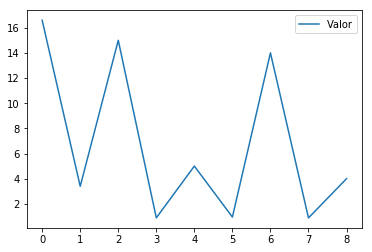

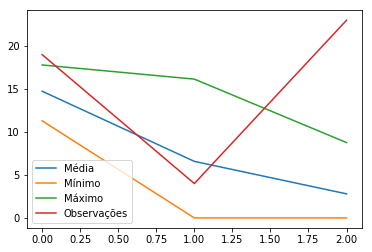

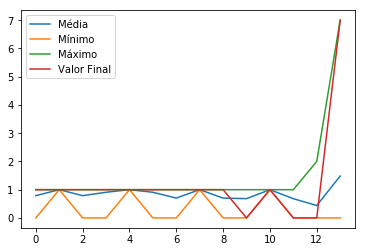

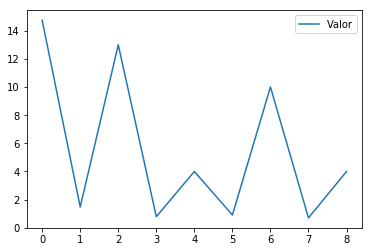

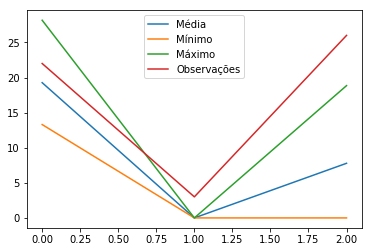

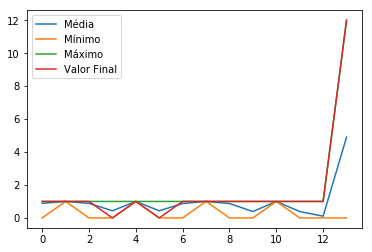

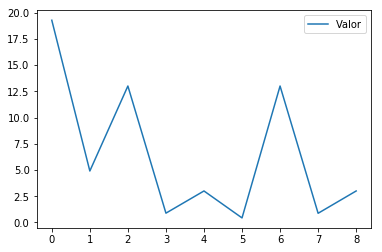

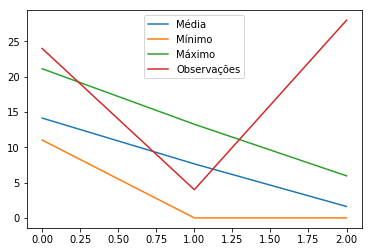

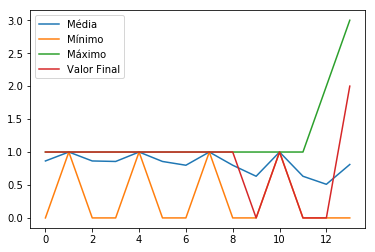

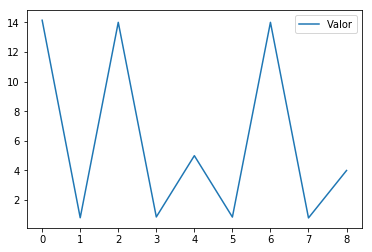

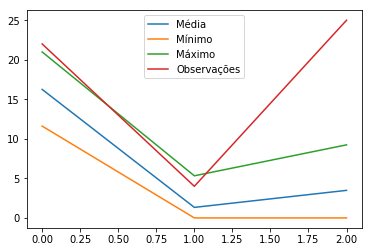

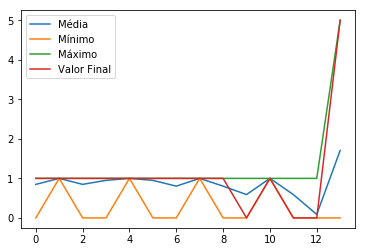

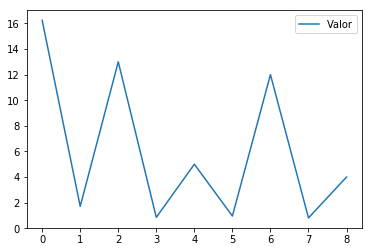

In [46]:
for i in range(len(dataframes)):
    dataframes[i].plot()